In [2]:
#import initial libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#importing ML stuff

import tensorflow as tf
from tensorflow import keras

In [4]:
#downloading the dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

##### Data Information

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

An household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surpinsingly large values for block groups with few households
and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

##### Moving on,
##### Also kind of important, the goal is to predict the value of a house.

In [5]:
fetch_california_housing().feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
from sklearn.model_selection import train_test_split
X_data_full, X_test, y_data_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_data_full, y_data_full, random_state=42)

In [7]:
#Standardization of Variables
#Subtracting the individual values with mean then dividing by variance 
# (X - avg) / Variance 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
X_test.shape

(5160, 8)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape = [8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss = "mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=['mae'])

In [13]:
model_history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.

In [14]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3942 - mae: 0.4502


In [15]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.48535555601119995,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549983620643616,
  0.41116511821746826,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618005990982056,
  0.5398454070091248,
  0.5237293839454651,
  0.5112563967704773,
  0.5010153651237488,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.46360209584236145,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [0.7126054763793945,
  0.6880088448524475,
  0.5803285837173462,
  0.51660853624

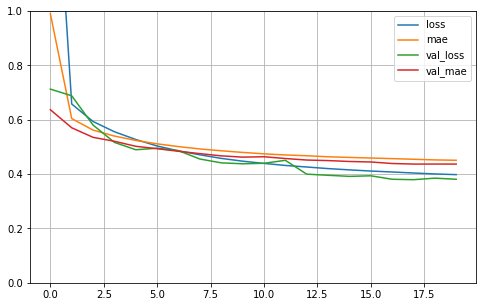

In [16]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [17]:
X_small = X_test[:3]

In [18]:
y_pred = model.predict(X_small)
print(y_pred)

1/1 [==============================] - 0s 240ms/step
[[0.53287673]
 [1.8915396 ]
 [3.4040868 ]]


In [19]:
model.save('californiahousing.h5')

Functional API way of arranging the machine learning model

In [31]:
#Mandartory Break

del model

keras.backend.clear_session()

NameError: name 'model' is not defined

In [32]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_], outputs = [output])

In [33]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [34]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['mae'])

In [35]:
model_history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_valid, y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.5051 - mae: 0.8803 - val_loss: 8.0610 - val_mae: 0.7193
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.8682 - mae: 0.6665 - val_loss: 2.1156 - val_mae: 0.6524
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.7151 - mae: 0.6138 - val_loss: 1.8516 - val_mae: 0.6129
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6811 - mae: 0.5989 - val_loss: 0.9023 - val_mae: 0.5845
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6295 - mae: 0.5756 - val_loss: 0.6122 - val_mae: 0.5545
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5973 - mae: 0.5603 - val_loss: 0.6409 - val_mae: 0.5416
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5743 - mae: 0.5485 - val_loss: 0.5588 - val_mae: 0.5264
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

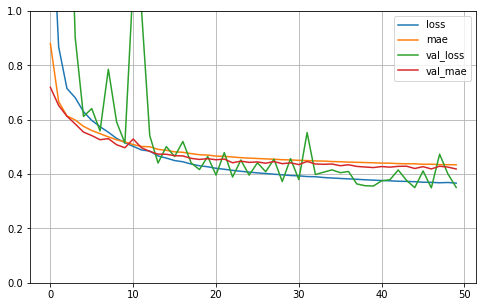

In [36]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [37]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3653 - mae: 0.4317


In [ ]:
model.save("functionalapi.h5")

#### Saving and Restoring Models